In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from keras import Input, Model
from keras.layers import InputLayer, Dense, concatenate
from keras.models import Sequential

In [3]:
df = pd.read_csv('loan_prediction_data.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0.0,0.0,0.000000,1.0,0.0,0.070489,0.000000,0.198860,0.74359,1.0,1.0,1.0
1,LP001003,0.0,1.0,0.333333,1.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,LP001005,0.0,1.0,0.000000,1.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,LP001006,0.0,1.0,0.000000,0.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,LP001008,0.0,0.0,0.000000,1.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [4]:
df.isna().sum()

,0
Loan_ID,0
Gender,0
Married,0
Dependents,0
Education,0
Self_Employed,0
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,0
Loan_Amount_Term,0


In [5]:
df.dtypes

,0
Loan_ID,object
Gender,float64
Married,float64
Dependents,float64
Education,float64
Self_Employed,float64
ApplicantIncome,float64
CoapplicantIncome,float64
LoanAmount,float64
Loan_Amount_Term,float64


In [6]:
df2 = df.drop('Loan_ID', axis=1)

In [7]:
X = df2.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [9]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((491, 11), (491,)), ((123, 11), (123,)))

In [10]:
input_neurons = X_train.shape[1]
no_of_hidden_layers = 2
hidden_layer_1 = 10
hidden_layer_2 = 5
output_neurons = 1

In [11]:
model = Sequential()
model.add(InputLayer(shape=(input_neurons, )))
model.add(Dense(units=hidden_layer_1, activation='relu'))
model.add(Dense(units=hidden_layer_2, activation='relu'))
model.add(Dense(units=output_neurons, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
model.history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.3647 - loss: 0.7397 - val_accuracy: 0.3821 - val_loss: 0.7268
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4211 - loss: 0.7189 - val_accuracy: 0.4634 - val_loss: 0.7062
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5038 - loss: 0.6975 - val_accuracy: 0.5122 - val_loss: 0.6927
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6619 - loss: 0.6870 - val_accuracy: 0.6748 - val_loss: 0.6835
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6679 - loss: 0.6837 - val_accuracy: 0.6911 - val_loss: 0.6799
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7036 - loss: 0.6783 - val_accuracy: 0.7073 - val_loss: 0.6773
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6913 - loss: 0.6770 - val_accuracy: 0.6992 - val_loss: 0.6749
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6743 - loss: 0.6759 - val_accuracy: 0.6992 - val_

In [15]:
x = Input(shape=(input_neurons, ))
hidden_layer1 = Dense(units=hidden_layer_1, activation='relu')(x)
hidden_layer2 = Dense(units=hidden_layer_2, activation='relu')(hidden_layer1)
output = Dense(units=output_neurons, activation='sigmoid')(hidden_layer2)
model_functional = Model(x, output)

In [16]:
model_functional.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 11)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 181 (724.00 B)

 Trainable params: 181 (724.00 B)

 Non-trainable params: 0 (0.00 B)

In [17]:
model_functional.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model_functional.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3780 - loss: 0.7039 - val_accuracy: 0.6016 - val_loss: 0.6976
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5970 - loss: 0.6936 - val_accuracy: 0.6667 - val_loss: 0.6920
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7093 - loss: 0.6881 - val_accuracy: 0.6829 - val_loss: 0.6881
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6998 - loss: 0.6837 - val_accuracy: 0.6992 - val_loss: 0.6850
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7233 - loss: 0.6797 - val_accuracy: 0.6992 - val_loss: 0.6818
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7378 - loss: 0.6757 - val_accuracy: 0.6911 - val_loss: 0.6790
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6992 - loss: 0.6767 - val_accuracy: 0.6911 - val_loss: 0.6763
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7100 - loss: 0.6733 - val_accuracy: 0.6911 - val_loss

In [19]:
prediction = model_functional.predict(X_test) > 0.5
prediction = prediction.astype(int)
accuracy_score(y_test, prediction)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


0.8536585365853658

In [20]:
input_neurons = X_train.shape[1]
hidden_layer_neurons1_1 = 20
hidden_layer_neurons1_2 = 10
hidden_layer_neurons2 = 5
output_neurons = 1

In [21]:
x = Input(shape=(input_neurons, ))
hidden_layer1_1 = Dense(units=hidden_layer_neurons1_1, activation='relu')(x)
hidden_layer1_2 = Dense(units=hidden_layer_neurons1_2, activation='relu')(x)
combined = concatenate([hidden_layer1_1, hidden_layer1_2])
hidden_layer2 = Dense(units=hidden_layer_neurons2, activation='relu')(combined)
output = Dense(units=output_neurons, activation='sigmoid')(hidden_layer2)

model_functional2 = Model(x, output)

In [22]:
model_functional2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [23]:
model_history = model_functional2.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)
model_history

Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3090 - loss: 0.7815 - val_accuracy: 0.4065 - val_loss: 0.7160
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4444 - loss: 0.7011 - val_accuracy: 0.7724 - val_loss: 0.6451
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7536 - loss: 0.6421 - val_accuracy: 0.7398 - val_loss: 0.5981
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6819 - loss: 0.6147 - val_accuracy: 0.6911 - val_loss: 0.5717
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6972 - loss: 0.5855 - val_accuracy: 0.6911 - val_loss: 0.5571
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7321 - loss: 0.5529 - val_accuracy: 0.6911 - val_loss: 0.5491
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6755 - loss: 0.5895 - val_accuracy: 0.6911 - val_loss: 0.5431
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7111 - loss: 0.5592 - val_accuracy: 0.6992 - val_loss

In [24]:
prediction2 = (model_functional2.predict(X_test) >= 0.5).astype(int)
accuracy_score(y_test, prediction2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


0.8617886178861789

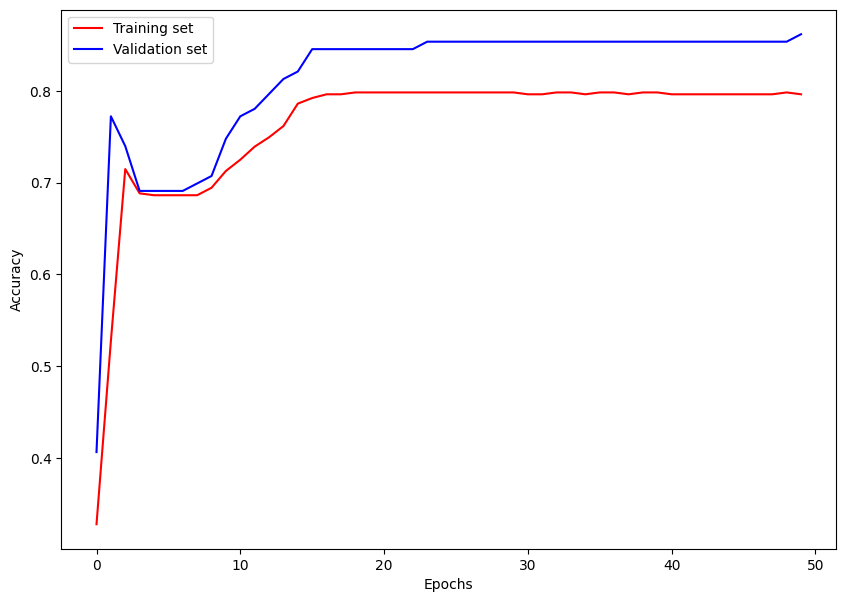

In [28]:
plt.figure(figsize=(10, 7))
plt.plot(model_history.history['accuracy'], color='red', label='Training set')
plt.plot(model_history.history['val_accuracy'], color='blue', label='Validation set')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

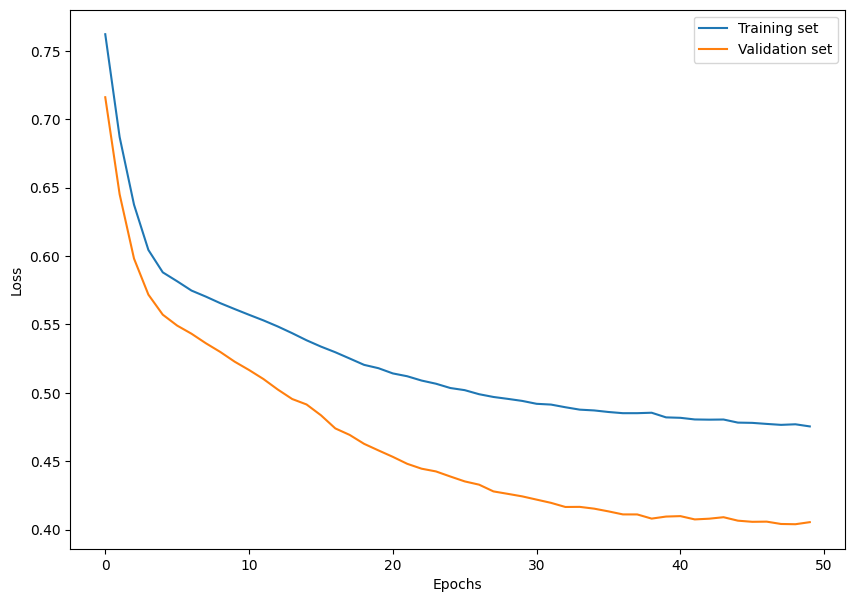

In [29]:
plt.figure(figsize=(10, 7))
plt.plot(model_history.history['loss'], label='Training set')
plt.plot(model_history.history['val_loss'], label='Validation set')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()